In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import urllib.request
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [83]:
#url = "https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/play_by_play_data/regular_season/reg_pbp_2019.csv"

In [84]:
#data = pd.read_csv(url)
data = pd.read_csv("C:\\Users\\kjyou\\Git\\nflscrapR-data\\updated2019.csv")

In [85]:
pd.options.mode.chained_assignment = None

In [86]:
data = data.loc[
    (data['epa'].notnull()) &
    ((data['play_type'] == 'no_play') |
    (data['play_type'] == 'pass') |
    (data['play_type'] == 'run'))
]

In [87]:
data.drop(data[(data['replay_or_challenge'] == 0) & (data['desc'].str.contains('Timeout'))].index, inplace=True)

In [88]:
data = data.loc[data.desc.str.contains('kneels|spiked') == False]

In [89]:
data.reset_index(drop=True, inplace=True)

In [91]:
data.insert(69, 'home_off_success', 0)

In [92]:
data.loc[data['epa'] > 0, 'home_off_success'] = 1

In [93]:
data.insert(70, 'home_off_epa', 0)

In [94]:
data['home_off_epa'] = data['epa']

In [95]:
data.insert(71, 'away_off_success', 0)

In [96]:
data.loc[(data.play_type!='no_play') & (data.posteam==data.home_team)].groupby(['posteam'])[['home_off_epa', 'home_off_success']].mean()

,home_off_epa,home_off_success
posteam,,
ARI,0.024365,0.449827
ATL,0.011282,0.428571
BAL,0.113706,0.463303
BUF,-0.137423,0.425676
CAR,-0.057507,0.415842
CHI,-0.171757,0.357143
CIN,0.014763,0.422222
CLE,-0.184908,0.415459
DAL,0.252265,0.526570


In [97]:
data.loc[data['epa'] > 0, 'away_off_success'] = 1

In [98]:
data.insert(72, 'away_off_epa', 0)

In [99]:
data['away_off_epa'] = data['epa']

In [100]:
data.loc[(data.play_type!='no_play') & (data.posteam==data.away_team)].groupby(['posteam'])[['away_off_epa', 'away_off_success']].mean()

,away_off_epa,away_off_success
posteam,,
ARI,0.168011,0.410853
ATL,0.149141,0.466912
BAL,0.214325,0.440678
BUF,0.018647,0.435897
CAR,0.042072,0.415789
CHI,0.032481,0.423729
CIN,-0.152988,0.352713
CLE,-0.010208,0.350575
DAL,0.125001,0.475728


In [101]:
data.insert(73, 'home_def_success', 0)

In [102]:
data.loc[data['epa'] > 0, 'home_def_success'] = 1

In [103]:
data.insert(74, 'home_def_epa', 0)

In [104]:
data['home_def_epa'] = data['epa']

In [105]:
data.loc[(data.play_type!='no_play') & (data.defteam==data.home_team)].groupby(['defteam'])[['home_def_epa', 'home_def_success']].mean()

,home_def_epa,home_def_success
defteam,,
ARI,0.201910,0.488806
ATL,-0.024555,0.373239
BAL,0.132467,0.388889
BUF,-0.244039,0.296610
CAR,-0.001213,0.446009
CHI,-0.202114,0.347458
CIN,0.310117,0.489362
CLE,0.134073,0.462312
DAL,0.011492,0.454106


In [106]:
data.insert(75, 'away_def_success', 0)

In [107]:
data.loc[data['epa'] > 0, 'away_def_success'] = 1

In [108]:
data.insert(76, 'away_def_epa', 0)

In [109]:
data['away_def_epa'] = data['epa']

In [111]:
data.loc[(data.play_type!='no_play') & (data.defteam==data.away_team)].groupby(['defteam'])[['away_def_epa', 'away_def_success']].mean()

,away_def_epa,away_def_success
defteam,,
ARI,0.100245,0.460993
ATL,0.346944,0.509960
BAL,-0.012786,0.426901
BUF,-0.071343,0.438144
CAR,-0.138863,0.436364
CHI,0.005920,0.444934
CIN,0.031420,0.462451
CLE,0.010840,0.408867
DAL,0.038826,0.434783


In [112]:
#data.insert(77, 'success', 0)

In [113]:
#data.loc[data['epa'] > 0, 'success'] = 1

In [114]:
def getImage(path): 
    return OffsetImage(plt.imread(path), zoom=1)

In [115]:
logos = os.listdir(os.getcwd() + '\\logos\\')

logo_paths = []

for i in logos:
    logo_paths.append(os.getcwd() + '\\logos\\' + str(i))

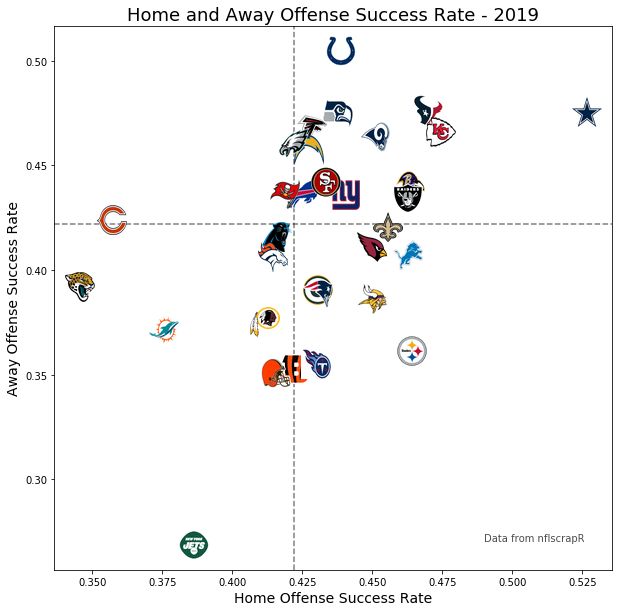

In [116]:
#Make x and y variables for success rate data
x = data.loc[(data.play_type!='no_play') & (data.posteam==data.home_team)].groupby(by='posteam')[['home_off_success']].mean().home_off_success.values
y = data.loc[(data.play_type!='no_play') & (data.posteam==data.away_team)].groupby(by='posteam')[['away_off_success']].mean().away_off_success.values

#Create a figure with size 10x10
fig, ax = plt.subplots(figsize=(10,10))

#Add Lines For Mean Results
ax.axvline(x=data.home_off_success.mean(), linestyle='--', alpha=.5, color='black')
ax.axhline(y=data.away_off_success.mean(), linestyle='--', alpha=.5, color='black')

#Make a scatter plot with success rate data
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

    #Adding labels and text
ax.set_xlabel('Home Offense Success Rate', fontsize=14)
ax.set_ylabel('Away Offense Success Rate', fontsize=14)
ax.set_title('Home and Away Offense Success Rate - 2019', fontsize=18)
ax.text(.95, .05, 'Data from nflscrapR', fontsize=10, alpha=.7, horizontalalignment='right',  verticalalignment='bottom', transform=ax.transAxes)

#Save the figure as a png
plt.savefig('img/2019-offense-home-away-success.png', dpi=400)

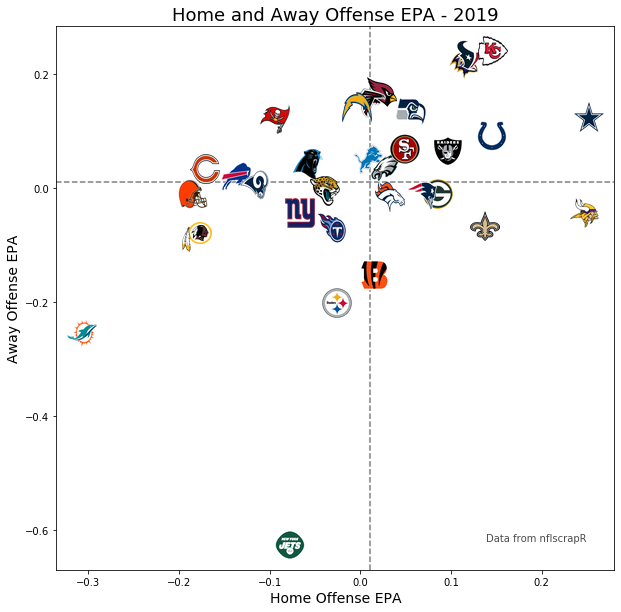

In [117]:
#Make x and y variables for success rate data
x = data.loc[(data.play_type!='no_play') & (data.posteam==data.home_team)].groupby(by='posteam')[['epa']].mean().epa.values
y = data.loc[(data.play_type!='no_play') & (data.posteam==data.away_team)].groupby(by='posteam')[['epa']].mean().epa.values

#Create a figure with size 10x10
fig, ax = plt.subplots(figsize=(10,10))

#Add Lines For Mean Results
ax.axvline(x=data.home_off_epa.mean(), linestyle='--', alpha=.5, color='black')
ax.axhline(y=data.away_off_epa.mean(), linestyle='--', alpha=.5, color='black')

#Make a scatter plot with success rate data
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

    #Adding labels and text
ax.set_xlabel('Home Offense EPA', fontsize=14)
ax.set_ylabel('Away Offense EPA', fontsize=14)
ax.set_title('Home and Away Offense EPA - 2019', fontsize=18)
ax.text(.95, .05, 'Data from nflscrapR', fontsize=10, alpha=.7, horizontalalignment='right',  verticalalignment='bottom', transform=ax.transAxes)

#Save the figure as a png
plt.savefig('img/2019-offense-home-away-epa.png', dpi=400)

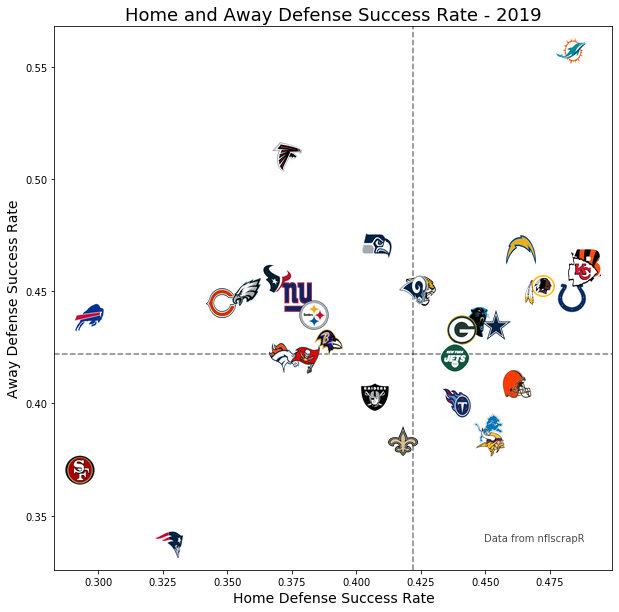

In [118]:
#Make x and y variables for success rate data
x = data.loc[(data.play_type!='no_play') & (data.defteam==data.home_team)].groupby(by='defteam')[['success']].mean().success.values
y = data.loc[(data.play_type!='no_play') & (data.defteam==data.away_team)].groupby(by='defteam')[['success']].mean().success.values

#Create a figure with size 10x10
fig, ax = plt.subplots(figsize=(10,10))

#Add Lines For Mean Results
ax.axvline(x=data.home_def_success.mean(), linestyle='--', alpha=.5, color='black')
ax.axhline(y=data.away_def_success.mean(), linestyle='--', alpha=.5, color='black')

#Make a scatter plot with success rate data
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

    #Adding labels and text
ax.set_xlabel('Home Defense Success Rate', fontsize=14)
ax.set_ylabel('Away Defense Success Rate', fontsize=14)
ax.set_title('Home and Away Defense Success Rate - 2019', fontsize=18)
ax.text(.95, .05, 'Data from nflscrapR', fontsize=10, alpha=.7, horizontalalignment='right',  verticalalignment='bottom', transform=ax.transAxes)

#Save the figure as a png
plt.savefig('img/2019-defense-home-away-success.png', dpi=400)

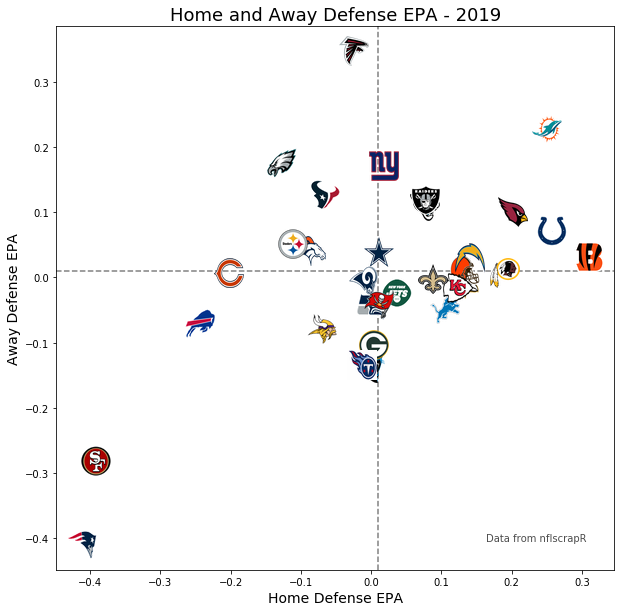

In [119]:
#Make x and y variables for success rate data
x = data.loc[(data.play_type!='no_play') & (data.defteam==data.home_team)].groupby(by='defteam')[['home_def_epa']].mean().home_def_epa.values
y = data.loc[(data.play_type!='no_play') & (data.defteam==data.away_team)].groupby(by='defteam')[['away_def_epa']].mean().away_def_epa.values

#Create a figure with size 10x10
fig, ax = plt.subplots(figsize=(10,10))

#Add Lines For Mean Results
ax.axvline(x=data.home_def_epa.mean(), linestyle='--', alpha=.5, color='black')
ax.axhline(y=data.away_def_epa.mean(), linestyle='--', alpha=.5, color='black')

#Make a scatter plot with success rate data
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

    #Adding labels and text
ax.set_xlabel('Home Defense EPA', fontsize=14)
ax.set_ylabel('Away Defense EPA', fontsize=14)
ax.set_title('Home and Away Defense EPA - 2019', fontsize=18)
ax.text(.95, .05, 'Data from nflscrapR', fontsize=10, alpha=.7, horizontalalignment='right',  verticalalignment='bottom', transform=ax.transAxes)

#Save the figure as a png
plt.savefig('img/2019-defense-home-away-epa.png', dpi=400)